In [1]:
  #import libraries 
    
import pandas as pd
import requests
from bs4 import BeautifulSoup as BS
import numpy as np
import re  
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [2]:
# create a Request object for the wikipedia page for the List of deadly earthquakes since 1900
response = requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

# read the resulting HTML into a variable called result_text
result_text = response.text

In [3]:
print(type(response))

print(type(result_text))

<class 'requests.models.Response'>
<class 'str'>


In [4]:
result_text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of deadly earthquakes since 1900 - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":840128723,"wgRevisionId":840128723,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pag

In [5]:
# create the soup by constructing a BS object from the html page and the appropriate parser
soup = BS(result_text, 'html.parser')

In [6]:
soup.title

<title>List of deadly earthquakes since 1900 - Wikipedia</title>

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":840128723,"wgRevisionId":840128723,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 20

In [8]:
# My_table = soup.find('table',{'class':'wikitable sortable'})



In [9]:
# find a table 

table=soup.findAll('table',attrs={'class':'sortable wikitable'})


In [10]:
table

[<table class="sortable wikitable">
 <tbody><tr bgcolor="#CCCCCC">
 <th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
 <th width="33%">Present-day country and link to Wikipedia article</th>
 <th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
 <th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
 <th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
 <th width="6%">Magnitude</th>
 <th width="9%">Secondary Effects</th>
 <th width="10%">PDE Shaking Deaths</th>
 <th width="10%">PDE Total Deaths</th>
 <th width="10%">Utsu Total Deaths</th>
 <th width="10%">EM-DAT Total Deaths</th>
 <th width="12%">Other Source Deaths
 </th></tr>
 <tr>
 <td>1900-05-11 17:23</td>
 <td>Japan</td>
 <td>38.700</td>
 <td>141.100</td>
 <td>5</td>
 <td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
 <td></td>
 <td><

In [11]:
# find table row

table_rows=table[0].findAll('tr')

In [12]:
table_rows

[<tr bgcolor="#CCCCCC">
 <th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
 <th width="33%">Present-day country and link to Wikipedia article</th>
 <th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
 <th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
 <th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
 <th width="6%">Magnitude</th>
 <th width="9%">Secondary Effects</th>
 <th width="10%">PDE Shaking Deaths</th>
 <th width="10%">PDE Total Deaths</th>
 <th width="10%">Utsu Total Deaths</th>
 <th width="10%">EM-DAT Total Deaths</th>
 <th width="12%">Other Source Deaths
 </th></tr>, <tr>
 <td>1900-05-11 17:23</td>
 <td>Japan</td>
 <td>38.700</td>
 <td>141.100</td>
 <td>5</td>
 <td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td>

In [13]:
# define a function to identify table head(th) and table data(td)

data=[]

for ind, tr in enumerate(table_rows):
    tag='td' if ind else 'th'
    row=[elem.text for elem in tr.findAll(tag)]
    data.append(row)
earthquakes_df=pd.DataFrame(data[1:],columns=data[0])
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100          5  7.0 MJMA                                        
1   43.100              5.9 Muk                                        
2  -66.000          0    7.7 Mw                                        
3  100.100          0    6.5 Ms                                        
4   28.700              6.4 Muk                                        

  PDE Total Deaths Utsu Total Deaths EM-DAT Total Deaths Other Source Deaths\n  
0                                                                           \n  
1                                140                                        \n  
2                                                                           \n  
3                                                                           \n  
4                                  4                                        \n

In [14]:
# remove \n string with empty string

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace('\n','')

In [15]:
earthquakes_df=earthquakes_df.replace("", np.nan)
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100          5  7.0 MJMA               NaN                NaN   
1   43.100        NaN   5.9 Muk               NaN                NaN   
2  -66.000          0    7.7 Mw               NaN                NaN   
3  100.100          0    6.5 Ms               NaN                NaN   
4   28.700        NaN   6.4 Muk               NaN                NaN   

  PDE Total Deaths Utsu Total Deaths EM-DAT Total Deaths Other Source Deaths\n  
0              NaN               NaN                 NaN                   NaN  
1              NaN               140                 NaN                   NaN  
2              NaN               NaN                 NaN                   NaN  
3              NaN               NaN                 NaN                   NaN  
4              NaN                 4                 NaN                   NaN

In [16]:
# see the column names
earthquakes_df.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n'],
      dtype='object')

In [17]:
# replace the + sign at the end of numbers on 'Other Source Deaths\n' column

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace('+','')

In [18]:
# remove anything in closed bracket and including the bracket itself.
earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].replace('\[\d+\]','',regex=True)

In [19]:
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489',
       '26271 26000', '68', '231000* 283000* 227898*', '41', '60', '215',
       '34', '295', '79', '189', '1,115', '222,517', '521', '42', '2,698',
       '181', '15894', '150', '111', '601 (as of October 30, 2011)'],
      dtype=object)

In [20]:
# remove everything in the parenthesis

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].replace('\(.*?\)','',regex=True)

In [21]:
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489',
       '26271 26000', '68', '231000* 283000* 227898*', '41', '60', '215',
       '34', '295', '79', '189', '1,115', '222,517', '521', '42', '2,698',
       '181', '15894', '150', '111', '601 '], dtype=object)

In [22]:
# remove * from the string 

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].replace(r'\*',value='',regex=True)

In [23]:
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489',
       '26271 26000', '68', '231000 283000 227898', '41', '60', '215',
       '34', '295', '79', '189', '1,115', '222,517', '521', '42', '2,698',
       '181', '15894', '150', '111', '601 '], dtype=object)

In [24]:
# replace  three values listed with average of the three.

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace('231000 283000 227898','247299')

In [25]:


earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace('26271 26000','26136')

earthquakes_df['Other Source Deaths\n']=earthquakes_df['Other Source Deaths\n'].str.replace(',','')

In [26]:
earthquakes_df['Other Source Deaths\n'].unique()

array([nan, '3500', '8000', '46', '164', '1500', '105000', '1404', '1',
       '120', '200', None, '380', '2041', '33', '45000', '2489', '26136',
       '68', '247299', '41', '60', '215', '34', '295', '79', '189',
       '1115', '222517', '521', '42', '2698', '181', '15894', '150',
       '111', '601 '], dtype=object)

In [27]:
# replace  5 ML with 5.0 ML  in magnitude column

earthquakes_df.Magnitude=earthquakes_df.Magnitude.str.replace('5 ML','5.0 ML')

In [28]:
# make sure 5 ML is replaced 
earthquakes_df[earthquakes_df.Magnitude.str[0]=='5 ML']

Empty DataFrame
Columns: [Origin (UTC), Present-day country and link to Wikipedia article, Lat, Long, Depth (km), Magnitude, Secondary Effects, PDE Shaking Deaths, PDE Total Deaths, Utsu Total Deaths, EM-DAT Total Deaths, Other Source Deaths
]
Index: []

In [29]:
# take only numbers from magnitude column
earthquakes_df.Magnitude=earthquakes_df.Magnitude.str.extract('(\d+\.\d+)')
pd.to_numeric(earthquakes_df.Magnitude)
earthquakes_df

Origin (UTC) Present-day country and link to Wikipedia article  \
0     1900-05-11 17:23                                             Japan   
1     1900-07-12 06:25                                            Turkey   
2     1900-10-29 09:11                                         Venezuela   
3     1901-02-15 00:00                                             China   
4     1901-03-31 07:11                                          Bulgaria   
5     1901-08-09 09:23                                             Japan   
6     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
7     1902-01-30 14:01                                             Japan   
8     1902-02-13 09:39                                        Azerbaijan   
9     1902-03-09 07:46                                            Turkey   
10    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
11    1902-07-03 15:36                                             China   
12    1902-08-22 03:00                                             China   
13          1902-09-19                                         Australia   
14    1902-12-16 05:07                                        Uzbekistan   
15    1903-03-29 22:30                                 Judea and Samaria   
16          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
17    1903-05-28 03:58                                            Turkey   
18    1903-08-11 04:32                                            Greece   
19    1903-09-25 01:20                                              Iran   
20    1904-04-24 06:39                                            Taiwan   
21    1904-08-11 05:56                                            Greece   
22    1904-08-30 11:42                                             China   
23    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
24    1905-04-04 00:50                                             India   
25    1905-06-01 04:42                                           Albania   
26    1905-06-02 05:39                                             Japan   
27    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
28    1905-11-08 22:06                                            Greece   
29    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1310  2008-05-25 08:21                                             China   
1311  2008-06-06 20:02                                           Algeria   
1312  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1313  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1314  2008-06-17 05:51                                             China   
1315  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1316  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1317   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1318  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1319  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1320  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1321  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1322  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1323  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1324  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1325  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1326  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1327  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1328  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1329  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1330  2010-03-08 02:32               Turkey (see 2010 Elâz

In [30]:
earthquakes_df.columns

Index(['Origin (UTC)', 'Present-day country and link to Wikipedia article',
       'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n'],
      dtype='object')

In [31]:
earthquakes_df['EM-DAT Total Deaths']=earthquakes_df['EM-DAT Total Deaths'].str.replace('\n','')
earthquakes_df['EM-DAT Total Deaths']=earthquakes_df['EM-DAT Total Deaths'].replace('\[\d+\]','',regex=True)
earthquakes_df['EM-DAT Total Deaths']=earthquakes_df['EM-DAT Total Deaths'].str.replace('|','')

In [32]:
earthquakes_df.info

<bound method DataFrame.info of           Origin (UTC) Present-day country and link to Wikipedia article  \
0     1900-05-11 17:23                                             Japan   
1     1900-07-12 06:25                                            Turkey   
2     1900-10-29 09:11                                         Venezuela   
3     1901-02-15 00:00                                             China   
4     1901-03-31 07:11                                          Bulgaria   
5     1901-08-09 09:23                                             Japan   
6     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
7     1902-01-30 14:01                                             Japan   
8     1902-02-13 09:39                                        Azerbaijan   
9     1902-03-09 07:46                                            Turkey   
10    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
11    1902-07-03 15:36                                  

In [33]:
earthquakes_df.loc[1327]

Origin (UTC)                                                               2009-09-30 10:16
Present-day country and link to Wikipedia article    Indonesia (see 2009 Padang earthquake)
Lat                                                                                     NaN
Long                                                                                    NaN
Depth (km)                                                                              NaN
Magnitude                                                                               7.6
Secondary Effects                                                                       NaN
PDE Shaking Deaths                                                                      NaN
PDE Total Deaths                                                                        NaN
Utsu Total Deaths                                                                       NaN
EM-DAT Total Deaths                                                             

In [34]:
earthquakes_df['EM-DAT Total Deaths']=pd.to_numeric(earthquakes_df['EM-DAT Total Deaths'])
earthquakes_df['Utsu Total Deaths']=pd.to_numeric(earthquakes_df['Utsu Total Deaths'])
earthquakes_df['PDE Total Deaths']=pd.to_numeric(earthquakes_df['PDE Total Deaths'])
earthquakes_df['Other Source Deaths'] =pd.to_numeric(earthquakes_df['Other Source Deaths\n'])



In [35]:
earthquakes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     750 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  560 non-null float64
Other Source Deaths
                                 37 non-null object
Other So

In [36]:
# create new 'deaths' column  comparing the four death columns and take the highest

earthquakes_df['deaths']=earthquakes_df[['PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n']].max(axis=1)

In [37]:
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100          5       7.0               NaN                NaN   
1   43.100        NaN       5.9               NaN                NaN   
2  -66.000          0       7.7               NaN                NaN   
3  100.100          0       6.5               NaN                NaN   
4   28.700        NaN       6.4               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0               NaN                NaN                  NaN   
1               NaN              140.0                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                4.0                  NaN   

  Other Source Deaths\n  Other Source Deaths  deaths  
0                   NaN                  NaN     NaN  
1                   NaN                  NaN   140.0  
2                   NaN                  NaN     NaN  
3                   NaN                  NaN     NaN  
4                   NaN                  NaN     4.0

# check type of data

In [38]:
earthquakes_df['Present-day country and link to Wikipedia article'].unique()

array(['Japan', 'Turkey', 'Venezuela', 'China', 'Bulgaria',
       'New Zealand (see 1901 Cheviot earthquake)', 'Azerbaijan',
       'Guatemala (see 1902 Guatemala earthquake)', 'Australia',
       'Uzbekistan', 'Judea and Samaria',
       'Turkey (see 1903 Manzikert earthquake)', 'Greece', 'Iran',
       'Taiwan', 'Taiwan (see 1904 Douliu earthquake)', 'India',
       'Albania', 'Italy (see 1905 Calabria earthquake)',
       'Ecuador (see 1906 Ecuador–Colombia earthquake)',
       'Taiwan (see 1906 Meishan earthquake)',
       'United States (see 1906 San Francisco earthquake)',
       'Chile (see 1906 Valparaíso earthquake)', 'Indonesia',
       'Jamaica (see 1907 Kingston earthquake)', 'Mexico', 'Philippines',
       'Tajikistan (see 1907 Qaratog earthquake)',
       'Italy (see 1908 Messina earthquake)',
       'Iran (see 1909 Borujerd earthquake)', 'Portugal',
       'France (see 1909 Provence earthquake)', 'Pakistan', 'Algeria',
       'Kazakhstan (see 1911 Kebin earthquake)', 'K

In [39]:
earthquakes_df['Country']=earthquakes_df['Present-day country and link to Wikipedia article'].str.extract('(\D+\D+\()')

In [40]:
# to extract only names of the countries

earthquakes_df['Country']=earthquakes_df['Present-day country and link to Wikipedia article']\
    .str.split('(')\
    .apply(lambda x:x[0])\
    .str.strip()  

In [41]:
earthquakes_df['Country'].unique()

array(['Japan', 'Turkey', 'Venezuela', 'China', 'Bulgaria', 'New Zealand',
       'Azerbaijan', 'Guatemala', 'Australia', 'Uzbekistan',
       'Judea and Samaria', 'Greece', 'Iran', 'Taiwan', 'India',
       'Albania', 'Italy', 'Ecuador', 'United States', 'Chile',
       'Indonesia', 'Jamaica', 'Mexico', 'Philippines', 'Tajikistan',
       'Portugal', 'France', 'Pakistan', 'Algeria', 'Kazakhstan',
       'Kyrgyzstan', 'Iceland', 'Burma', 'Peru', 'El Salvador',
       'Colombia', 'Russian Federation', 'Puerto Rico',
       'Papua New Guinea', 'Georgia', 'Argentina', 'Eritrea',
       'Bangladesh', 'Nicaragua', 'Mandatory Palestine and Transjordan',
       'Turkmenistan', 'Saint Pierre and Miquelon',
       'Kingdom of Yugoslavia', 'Armenia', 'England', 'Solomon Islands',
       'Cuba', 'Nepal', 'Ghana', 'Romania', 'Yemen', 'Canada',
       'Dominican Republic', 'Tajik Soviet Socialist Republic', 'Haiti',
       'Cyprus', 'Fiji', 'Egypt', 'Costa Rica', 'Hungary',
       'Syrian Arab Repu

In [42]:
earthquakes_df

Origin (UTC) Present-day country and link to Wikipedia article  \
0     1900-05-11 17:23                                             Japan   
1     1900-07-12 06:25                                            Turkey   
2     1900-10-29 09:11                                         Venezuela   
3     1901-02-15 00:00                                             China   
4     1901-03-31 07:11                                          Bulgaria   
5     1901-08-09 09:23                                             Japan   
6     1901-11-15 20:15         New Zealand (see 1901 Cheviot earthquake)   
7     1902-01-30 14:01                                             Japan   
8     1902-02-13 09:39                                        Azerbaijan   
9     1902-03-09 07:46                                            Turkey   
10    1902-04-19 02:23         Guatemala (see 1902 Guatemala earthquake)   
11    1902-07-03 15:36                                             China   
12    1902-08-22 03:00                                             China   
13          1902-09-19                                         Australia   
14    1902-12-16 05:07                                        Uzbekistan   
15    1903-03-29 22:30                                 Judea and Samaria   
16          1903-04-28            Turkey (see 1903 Manzikert earthquake)   
17    1903-05-28 03:58                                            Turkey   
18    1903-08-11 04:32                                            Greece   
19    1903-09-25 01:20                                              Iran   
20    1904-04-24 06:39                                            Taiwan   
21    1904-08-11 05:56                                            Greece   
22    1904-08-30 11:42                                             China   
23    1904-11-05 20:25               Taiwan (see 1904 Douliu earthquake)   
24    1905-04-04 00:50                                             India   
25    1905-06-01 04:42                                           Albania   
26    1905-06-02 05:39                                             Japan   
27    1905-09-08 01:43              Italy (see 1905 Calabria earthquake)   
28    1905-11-08 22:06                                            Greece   
29    1906-01-31 15:36    Ecuador (see 1906 Ecuador–Colombia earthquake)   
...                ...                                               ...   
1310  2008-05-25 08:21                                             China   
1311  2008-06-06 20:02                                           Algeria   
1312  2008-06-08 12:25          Greece (see 2008 Peloponnese earthquake)   
1313  2008-06-13 23:43  Japan (see 2008 Iwate–Miyagi Nairiku earthquake)   
1314  2008-06-17 05:51                                             China   
1315  2008-07-15 03:26           Greece (see 2008 Dodecanese earthquake)   
1316  2008-08-21 12:24            China (see 2008 Yingjiang earthquakes)   
1317   2008-08-30 8:30             China (see 2008 Panzhihua earthquake)   
1318  2008-10-05 15:52       Kyrgyzstan (see 2008 Kyrgyzstan earthquake)   
1319  2008-10-06 16:30               China (see 2008 Damxung earthquake)   
1320  2008-10-28 23:09             Pakistan (see 2008 Ziarat earthquake)   
1321  2009-01-08 19:21         Costa Rica (see 2009 Cinchona earthquake)   
1322  2009-04-06 03:32              Italy (see 2009 L'Aquila earthquake)   
1323  2009-07-09 11:19                China (see 2009 Yunnan earthquake)   
1324  2009-08-10 20:07              Japan (see 2009 Shizuoka earthquake)   
1325  2009-09-02 07:55         Indonesia (see 2009 West Java earthquake)   
1326  2009-09-29 17:48     Samoa (see 2009 Samoa earthquake and tsunami)   
1327  2009-09-30 10:16            Indonesia (see 2009 Padang earthquake)   
1328  2010-01-12 17:00                 Haiti (see 2010 Haiti earthquake)   
1329  2010-02-27 06:34                 Chile (see 2010 Chile earthquake)   
1330  2010-03-08 02:32               Turkey (see 2010 Elâz

In [43]:
# extract the Year from Origin(UTC)

earthquakes_df['Year']=earthquakes_df['Origin (UTC)'].str[:4]
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long Depth (km) Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100          5       7.0               NaN                NaN   
1   43.100        NaN       5.9               NaN                NaN   
2  -66.000          0       7.7               NaN                NaN   
3  100.100          0       6.5               NaN                NaN   
4   28.700        NaN       6.4               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0               NaN                NaN                  NaN   
1               NaN              140.0                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                4.0                  NaN   

  Other Source Deaths\n  Other Source Deaths  deaths    Country  Year  
0                   NaN                  NaN     NaN      Japan  1900  
1                   NaN                  NaN   140.0     Turkey  1900  
2                   NaN                  NaN     NaN  Venezuela  1900  
3                   NaN                  NaN     NaN      China  1901  
4                   NaN                  NaN     4.0   Bulgaria  1901

In [44]:
# there is '?' string that is prohibting to convert it into numeric
earthquakes_df.loc[413]

Origin (UTC)                                                               1963-06-26 04:17
Present-day country and link to Wikipedia article    Macedonia (see 1963 Skopje earthquake)
Lat                                                                                       ?
Long                                                                                     ??
Depth (km)                                                                                ?
Magnitude                                                                               6.1
Secondary Effects                                                                       NaN
PDE Shaking Deaths                                                                      NaN
PDE Total Deaths                                                                       1100
Utsu Total Deaths                                                                       NaN
EM-DAT Total Deaths                                                             

In [45]:
earthquakes_df['Depth (km)']=earthquakes_df['Depth (km)'].str.replace('?','')

In [46]:
# convert depth to numeric
earthquakes_df['Depth (km)']=pd.to_numeric(earthquakes_df['Depth (km)'])

In [47]:
# convert Magnitude to numerical values

earthquakes_df['Magnitude']=pd.to_numeric(earthquakes_df['Magnitude'])

In [48]:
# take selected columns
Death_country=earthquakes_df.loc[:,['Country','Year','Depth (km)','Magnitude','deaths']]
Death_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
Country       1340 non-null object
Year          1340 non-null object
Depth (km)    1249 non-null float64
Magnitude     1339 non-null float64
deaths        1245 non-null float64
dtypes: float64(3), object(2)
memory usage: 52.4+ KB


### for shallower  source of the earth quakes the magnitude of  scales ranges from 2 to 10
### the relationship is not clear

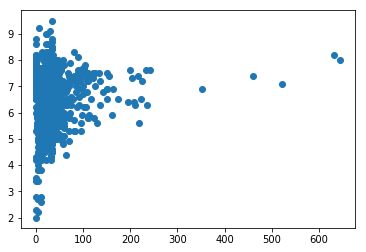

In [49]:
# Depth vs Magnitude

plt.scatter(Death_country['Depth (km)'],Death_country.Magnitude)


# for magnitude above 7.0 , there is positive relationship between the magnitude and number of deaths caused.

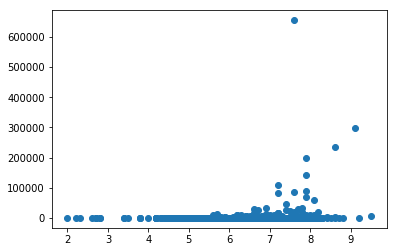

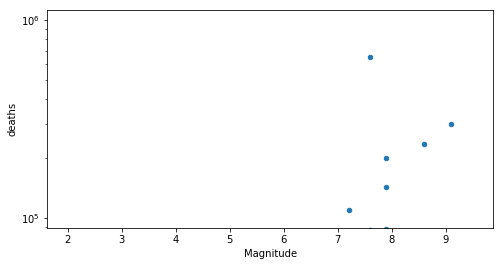

In [50]:

plt.scatter(Death_country.Magnitude,Death_country.deaths)

Death_country.plot(kind='scatter',x='Magnitude',y='deaths',logy=True,figsize=(8,4))

# depth of earthquakes source  has no clear relation with number of deaths, but few incidents with shallow depth have higher deaths

# earthquakes with higher depth earthquakes have smaller death numbers

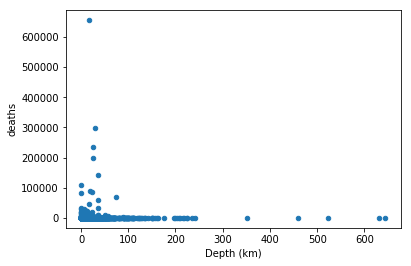

In [51]:
# check if depth of the source of the earthquake makes the destruction less?

Death_country.plot(kind='scatter',x='Depth (km)',y='deaths')

In [52]:
# take only three columns
deaths_by_country=Death_country.loc[:,['Country','Year','deaths']]

In [53]:
# count earthquakes events per country

earthquake_occurrence=Death_country.loc[:,['Country','Year']]
count_earthquakes=earthquake_occurrence.groupby('Country').count()
count_earthquakes.rename(columns={'Year':"Count"},inplace=True)
count_earthquakes=count_earthquakes.sort_values('Count',ascending=False).head(15)
count_earthquakes

Count
Country             
China            166
Indonesia         96
Turkey            95
Iran              91
Japan             82
Peru              54
Taiwan            48
Mexico            46
Chile             44
Greece            44
Philippines       39
Italy             37
United States     34
Afghanistan       30
Pakistan          26

# China has the highest number of earthquakes incidents

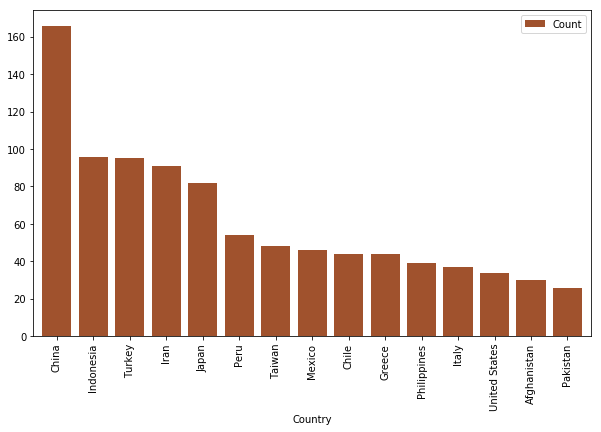

In [54]:
count_earthquakes.plot(kind='bar',width=0.8,color='sienna',figsize=(10,6))

In [55]:
# number of deaths by country

death_aggregate=deaths_by_country.groupby('Country').sum()

# China has the highest number of total deaths

In [56]:
# sort by deaths in descending order
# See top 10 countries with highedeath_aggregate.sort_values('deaths',ascending=False).head(10)

In [57]:
# where did the highest causlity occured
highest_death=death_aggregate.nlargest(20,'deaths')
highest_death=highest_death.reset_index()
highest_death.head()

Country     deaths
0      China  1281643.0
1  Indonesia   342380.0
2       Iran   169947.0
3      Japan   169225.0
4   Pakistan   157637.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

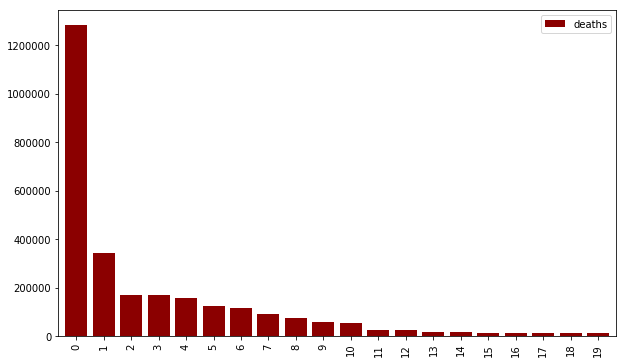

In [58]:
highest_death.plot(kind='bar',width=0.8,color='darkred',figsize=(10,6))
plt.xticks(rotation=90)

In [59]:
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long  Depth (km)  Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100         5.0        7.0               NaN                NaN   
1   43.100         NaN        5.9               NaN                NaN   
2  -66.000         0.0        7.7               NaN                NaN   
3  100.100         0.0        6.5               NaN                NaN   
4   28.700         NaN        6.4               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0               NaN                NaN                  NaN   
1               NaN              140.0                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                4.0                  NaN   

  Other Source Deaths\n  Other Source Deaths  deaths    Country  Year  
0                   NaN                  NaN     NaN      Japan  1900  
1                   NaN                  NaN   140.0     Turkey  1900  
2                   NaN                  NaN     NaN  Venezuela  1900  
3                   NaN                  NaN     NaN      China  1901  
4                   NaN                  NaN     4.0   Bulgaria  1901

In [60]:
# create dummy variable for secondary effeects.
earthquakes_df['Secondary Effects'].unique()
earthquakes_df['Secondary Effects']=earthquakes_df['Secondary Effects'].str.replace('T,LF','T,L,F')

In [61]:
earthquakes_df=earthquakes_df.join(earthquakes_df['Secondary Effects'].str.get_dummies(sep=','))


In [62]:
earthquakes_df.head()

Origin (UTC) Present-day country and link to Wikipedia article     Lat  \
0  1900-05-11 17:23                                             Japan  38.700   
1  1900-07-12 06:25                                            Turkey  40.300   
2  1900-10-29 09:11                                         Venezuela  11.000   
3  1901-02-15 00:00                                             China  26.000   
4  1901-03-31 07:11                                          Bulgaria  43.400   

      Long  Depth (km)  Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.100         5.0        7.0               NaN                NaN   
1   43.100         NaN        5.9               NaN                NaN   
2  -66.000         0.0        7.7               NaN                NaN   
3  100.100         0.0        6.5               NaN                NaN   
4   28.700         NaN        6.4               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths  EM-DAT Total Deaths  \
0               NaN                NaN                  NaN   
1               NaN              140.0                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                4.0                  NaN   

  Other Source Deaths\n  Other Source Deaths  deaths    Country  Year  F  L  \
0                   NaN                  NaN     NaN      Japan  1900  0  0   
1                   NaN                  NaN   140.0     Turkey  1900  0  0   
2                   NaN                  NaN     NaN  Venezuela  1900  0  0   
3                   NaN                  NaN     NaN      China  1901  0  0   
4                   NaN                  NaN     4.0   Bulgaria  1901  0  0   

   Lq  T  
0   0  0  
1   0  0  
2   0  0  
3   0  0  
4   0  0

In [63]:
Sec_effects=earthquakes_df.loc[
    (earthquakes_df.F==1)|(earthquakes_df.L==1)|(earthquakes_df.Lq==1)|(earthquakes_df['T']==1),
]

# the plot doesn't show if existence of  Tsunami causes more deaths

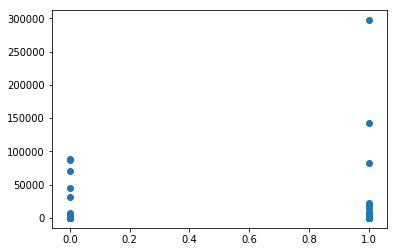

In [64]:
# plot relationship between deaths and secondary effects involved.

plt.scatter(Sec_effects['T'],Sec_effects.deaths)


In [65]:
# the outlier is Indonesia

outlier=Sec_effects.loc[(Sec_effects.L==1) & (Sec_effects.deaths>=280000),]
outlier

Origin (UTC) Present-day country and link to Wikipedia article  \
1238  2004-12-26 00:58      Indonesia (see 2004 Indian Ocean earthquake)   

        Lat    Long  Depth (km)  Magnitude Secondary Effects  \
1238  3.287  95.972        30.0        9.1               T,L   

     PDE Shaking Deaths  PDE Total Deaths  Utsu Total Deaths  \
1238                NaN          297200.0                NaN   

      EM-DAT Total Deaths Other Source Deaths\n  Other Source Deaths  \
1238                  NaN                247299             247299.0   

        deaths    Country  Year  F  L  Lq  T  
1238  297200.0  Indonesia  2004  0  1   0  1

# No clear relation between Landslide incidence and number of deaths

Text(0.5,0,'Landslide Occurence')

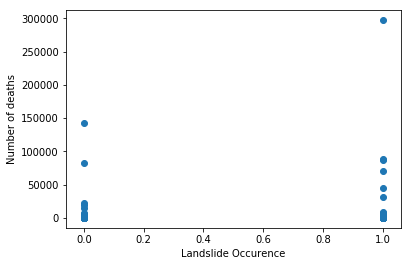

In [66]:
# plot relationship between deaths and secondary effects Landslide.

plt.scatter(Sec_effects['L'],Sec_effects.deaths)
plt.ylabel('Number of deaths')
plt.xlabel('Landslide Occurence')

In [67]:
# take only selected columns
earthquakes_dummy=Sec_effects.loc[:,['Country','deaths','F','L','Lq','T']]

In [68]:
# count of deaths and secondary effects by category
earthquakes_dummy=earthquakes_dummy.groupby('Country').sum().sort_values('deaths',ascending=False)
earthquakes_dummy.head(10)


deaths   F   L  Lq   T
Country                            
Indonesia  327806.0   2  15   1  31
Japan      168370.0  11  13   1  33
China       92589.0   1  12   0   0
Pakistan    91722.0   0   7   1   1
Italy       84539.0   0   3   0   2
Iran        77751.0   0  13   0   0
Peru        71303.0   0   9   0  10
Chile       27582.0   0   8   1  19
Guatemala   23035.0   0   4   0   1
Ecuador     11056.0   0   6   0   2

# top 10 countries with counts of death and secondary effects

In [69]:
earthquakes_dummy.head(10)
earthquakes_dummy=earthquakes_dummy.reset_index()
earthquakes_dummy.head(10)

Country    deaths   F   L  Lq   T
0  Indonesia  327806.0   2  15   1  31
1      Japan  168370.0  11  13   1  33
2      China   92589.0   1  12   0   0
3   Pakistan   91722.0   0   7   1   1
4      Italy   84539.0   0   3   0   2
5       Iran   77751.0   0  13   0   0
6       Peru   71303.0   0   9   0  10
7      Chile   27582.0   0   8   1  19
8  Guatemala   23035.0   0   4   0   1
9    Ecuador   11056.0   0   6   0   2

# relationship between number of Tsunami Incidents and deaths in countries.

# The points represent countries. The relation is ambiguous, but countries with more than 5 Tsunami incidents had higher death numbers as incidents of Tsunami increases.

Text(0.5,0,'Tsunami')

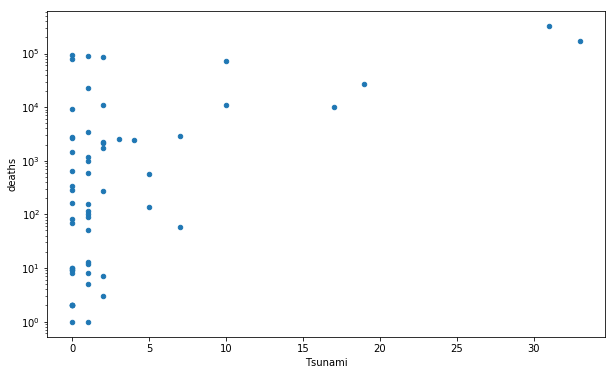

In [70]:
earthquakes_dummy.plot(kind='scatter',x='T',y='deaths',logy=True,figsize=(10,6))
plt.xlabel('Tsunami')


# In countries that had earthquakes and Landslides ,  
 #  number of deaths are positively associated with landslide incidents.

Text(0.5,0,'Number of Landslide Incidents')

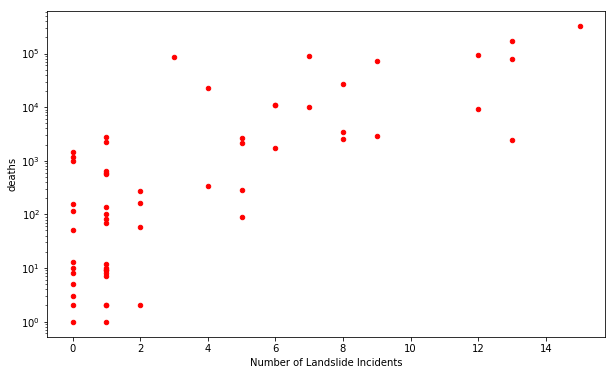

In [71]:
earthquakes_dummy.plot(kind='scatter',x='L',y='deaths',color='red',logy=True,figsize=(10,6))
plt.xlabel('Number of Landslide Incidents')

In [72]:
#  top 15 countries sorted by Tsunami 
earthquakes_Pair=earthquakes_dummy.set_index('Country').nlargest(15,'T')
earthquakes_Pair=earthquakes_Pair.drop(['deaths'],axis=1)
earthquakes_Pair

F   L  Lq   T
Country                           
Japan               11  13   1  33
Indonesia            2  15   1  31
Chile                0   8   1  19
Mexico               0   7   0  17
Peru                 0   9   0  10
Philippines          0   6   3  10
Papua New Guinea     0   9   1   7
Russian Federation   0   2   0   7
Greece               0   1   0   5
Solomon Islands      0   1   0   5
Taiwan               0  13   0   4
United States        1   8   4   3
Italy                0   3   0   2
Ecuador              0   6   0   2
Algeria              0   1   1   2

# Tsunami incident was highest in Japan followed by Indonesia, then Chile and Mexico.
# Lanslide was highest in Indonesia, followed by Taiwan and then Japan.
# USA has all four incidents,Lanslide was more frequent compared to other indicents.
# China reported 12 incidents of Lanslides and 1 indident of fire.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

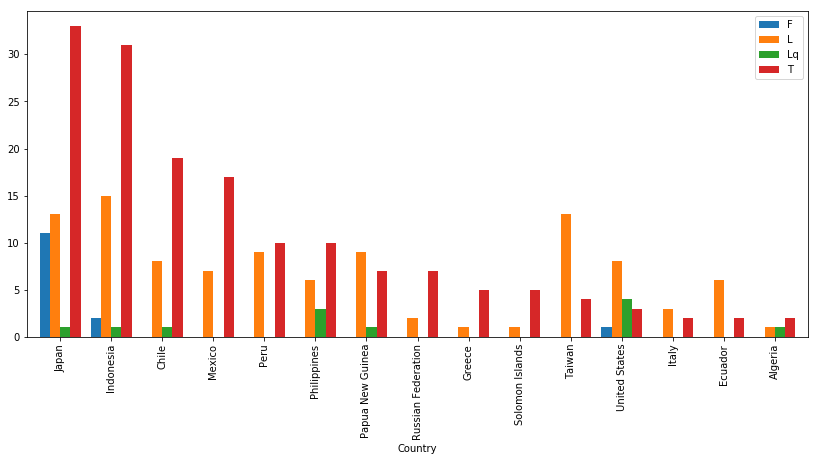

In [73]:
# pair pair plot
earthquakes_Pair.plot(kind='bar',width=0.8,figsize=(14,6))
plt.xticks(rotation=90)

In [74]:
# find top 20 countries in terms of secondary effects.

top_Tsunami=earthquakes_dummy.sort_values('T').nlargest(20,'T')
top_Landslide=earthquakes_dummy.sort_values('L').nlargest(20,'L')
top_Fire=earthquakes_dummy.sort_values('F').nlargest(10,'F')
top_Lq=earthquakes_dummy.sort_values('Lq').nlargest(20,'Lq')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

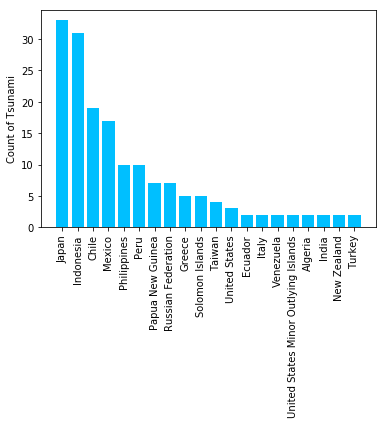

In [75]:
plt.bar(top_Tsunami.Country,height=top_Tsunami['T'],width=0.8,color='deepskyblue')
plt.ylabel('Count of Tsunami')
plt.xticks(rotation=90)

In [76]:
#replace string ?, ?? with NaN. 

earthquakes_df['Long']=earthquakes_df['Long'].replace('??',np.nan)

earthquakes_df['Lat']=earthquakes_df.Lat.replace('?',np.nan)

earthquakes_df['Long']=pd.to_numeric(earthquakes_df.Long,errors='coerce')
earthquakes_df['Lat']=pd.to_numeric(earthquakes_df.Lat,errors='coerce')

In [77]:
#  rename column 
earthquakes_df.rename(columns={"Origin (UTC)":'Origin'},inplace=True)

# create geometry for earthquakes_df data

earthquake_map=earthquakes_df
earthquake_map=earthquake_map.dropna(subset=['Lat'])
earthquakes_df['geometry'] = earthquakes_df.apply(lambda x: Point((float(x.Long), float(x.Lat))), axis=1)
earthquake_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1325 entries, 0 to 1339
Data columns (total 20 columns):
Origin                                               1325 non-null object
Present-day country and link to Wikipedia article    1325 non-null object
Lat                                                  1325 non-null float64
Long                                                 1325 non-null float64
Depth (km)                                           1248 non-null float64
Magnitude                                            1324 non-null float64
Secondary Effects                                    370 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     749 non-null float64
Utsu Total Deaths                                    1027 non-null float64
EM-DAT Total Deaths                                  559 non-null float64
Other Source Deaths
                                 27 non-null object
Othe

In [78]:
# read tectonic boundaries data

plate_bounds = gpd.read_file('tectonic_boundaries.geojson')

In [79]:
plate_bounds.head()

cartodb_id        type plateb platea                         source   name  \
0           4                 AN     SO           Lemaux et al. [2002]  SO-AN   
1           6                 IN     SO          Mueller et al. [1987]  SO-IN   
2          27  subduction     SA     AN            by Peter Bird, 1999  AN\SA   
3          31                 AU     TI  by Peter Bird, September 2001  TI-AU   
4          57  subduction     SA     CA            by Peter Bird, 1999  CA/SA   

            layer                                           geometry  
0  plate boundary  (LINESTRING (32.1258 -46.9998, 33.1739 -47.264...  
1  plate boundary  (LINESTRING (58.2392 12.7455, 57.8675 13.0023,...  
2  plate boundary  (LINESTRING (-76.4833 -52.0684, -76.6256999999...  
3  plate boundary  (LINESTRING (131.415 -8.267469999999999, 131.8...  
4  plate boundary  (LINESTRING (-58.1571 10.1597, -57.7617 10.634...

In [80]:
# 

earthquake_geo = gpd.GeoDataFrame(earthquake_map, crs = plate_bounds.crs, geometry = earthquakes_df['geometry'])

In [81]:
earthquakes_df.columns

Index(['Origin', 'Present-day country and link to Wikipedia article', 'Lat',
       'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects',
       'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths',
       'EM-DAT Total Deaths', 'Other Source Deaths\n', 'Other Source Deaths',
       'deaths', 'Country', 'Year', 'F', 'L', 'Lq', 'T', 'geometry'],
      dtype='object')

In [82]:
#create our map of world
map_world = folium.Map(location = [0,0], zoom_start = 2)

#draw  plate boundaries: plate_bounds
folium.GeoJson(plate_bounds).add_to(map_world)

#iterate through our earthquake_map to create locations and markers for each piece
#here lat is listed first!!
#also the apostrophe in the 4th row causes problems!

for row in earthquake_map.iterrows():
    row_values = row[1] 
    location = [row_values['Lat'], row_values['Long']]
    popup = 'Date: ' + str(row_values['Origin']) + '<br/>' +  'Country: ' + str(row_values['Country']) + '<br/>' + 'Magnitude: ' + str(row_values['Magnitude'])+ '<br/>'+ 'Deaths: ' + str(row_values['deaths'])
    mag_radius = 4.5 ** row_values['Magnitude'] 
    death_radius = row_values['deaths']  * 5
    #marker = folium.Marker(location = location, popup = popup)
    if row_values['Magnitude'] > 5.5:
        marker = folium.Circle(location=location, popup=popup, radius=mag_radius, color='crimson', fill=False, fill_color='crimson').add_to(map_world)
        marker.add_to(map_world)
    if row_values['deaths'] > 10000:
        marker = folium.Circle(location=location, popup=popup, radius=death_radius, color='green', fill=False, fill_color='green').add_to(map_world)
        marker.add_to(map_world)

# Show map

map_world

In [83]:
# Import Regions data
regions_df=pd.read_csv('regions_df.csv')
regions_df.head()

Unnamed: 0                   Country                   Region  \
0           0               Andorra\r\n               Europe\r\n   
1           1  United Arab Emirates\r\n          Arab States\r\n   
2           2           Afghanistan\r\n       Asia & Pacific\r\n   
3           3   Antigua and Barbuda\r\n  South/Latin America\r\n   
4           4              Anguilla\r\n  South/Latin America\r\n   

             Global  
0  Global North\r\n  
1  Global South\r\n  
2  Global South\r\n  
3  Global South\r\n  
4  Global South\r\n

In [84]:
# keep only Country and Region

regions_df=regions_df.loc[:,['Country','Region']]

In [85]:
# remove the string '\r\n'

regions_df['Country']=regions_df['Country'].str.replace('\r\n','')
regions_df['Region']=regions_df['Region'].str.replace('\r\n','')

In [86]:
regions_df.head()

Country               Region
0               Andorra               Europe
1  United Arab Emirates          Arab States
2           Afghanistan       Asia & Pacific
3   Antigua and Barbuda  South/Latin America
4              Anguilla  South/Latin America

In [87]:
# merge world regions data earthquake_df
earthquake_by_region=earthquakes_df.merge(regions_df,on=['Country'])

In [88]:
earthquake_by_region.head()

Origin Present-day country and link to Wikipedia article   Lat  \
0  1900-05-11 17:23                                             Japan  38.7   
1  1901-08-09 09:23                                             Japan  40.5   
2  1902-01-30 14:01                                             Japan  40.5   
3  1905-06-02 05:39                                             Japan  34.1   
4  1909-08-14 06:31                                             Japan  35.4   

    Long  Depth (km)  Magnitude Secondary Effects PDE Shaking Deaths  \
0  141.1         5.0        7.0               NaN                NaN   
1  142.5        35.0        7.2                 T                NaN   
2  141.3        35.0        6.9               NaN                NaN   
3  132.5        55.0        7.0               NaN                NaN   
4  136.3         5.0        6.7               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths       ...        Other Source Deaths  \
0               NaN                NaN       ...                        NaN   
1               NaN                NaN       ...                        NaN   
2               NaN                1.0       ...                        NaN   
3               NaN               11.0       ...                        NaN   
4               NaN               41.0       ...                        NaN   

  deaths  Country  Year  F  L  Lq  T            geometry          Region  
0    NaN    Japan  1900  0  0   0  0  POINT (141.1 38.7)  Asia & Pacific  
1    NaN    Japan  1901  0  0   0  1  POINT (142.5 40.5)  Asia & Pacific  
2    1.0    Japan  1902  0  0   0  0  POINT (141.3 40.5)  Asia & Pacific  
3   11.0    Japan  1905  0  0   0  0  POINT (132.5 34.1)  Asia & Pacific  
4   41.0    Japan  1909  0  0   0  0  POINT (136.3 35.4)  Asia & Pacific  

[5 rows x 22 columns]

In [89]:
# replace 'Asic & Pacific' with "Asia & Pacific'
earthquake_by_region['Region']=earthquake_by_region['Region'].str.replace('Asic & Pacific','Asia & Pacific')

In [90]:
# keep selected columns 
earthquake_region=earthquake_by_region.loc[:,['Region','Country','deaths','Magnitude','Year']]

# deaths due earthquakes by regions of the world

# Asia & Pacific Regions are the most affected areas in terms of death,Africa least affected by earthquakes

# Only in Asia & Pacific Region over Two million people died in the last century because of earthquakes

In [91]:
deaths_by_region=earthquake_region.loc[:,['Region','Country','deaths','Year']]
deaths_by_region=deaths_by_region.groupby('Region').sum()
deaths_by_region=deaths_by_region.sort_values('deaths',ascending=False)
deaths_by_region

deaths
Region                        
Asia & Pacific       2184558.0
Europe                249454.0
South/Latin America   218165.0
Arab States            27728.0
North America           2670.0
Africa                   843.0

# Asia & Pacific Region has the Maximum number of earthquake incidents  followed by Latin America. 

# Asia & Pacific region expreinced  598 earthquakes in the last 100 years.

In [92]:
counts_by_region_df=earthquake_region.loc[:,['Region','Country']]
counts_by_region=counts_by_region_df.groupby('Region').count()
counts_by_region.rename(columns={'Country':'Counts'},inplace=True)
counts_by_region=counts_by_region.sort_values('Counts',ascending=False)
counts_by_region

Counts
Region                     
Asia & Pacific          598
South/Latin America     271
Europe                  247
Arab States              39
North America            38
Africa                   25

plt.subplot(1,2,1)

subplot(nrows, ncols, index, **kwargs)
subplot(pos, **kwargs)
subplot(ax)

In [93]:
# Import total population by countries 
pop_size=pd.read_csv('population.csv',skiprows=4)

In [94]:
pop_size.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965     ...       \
0    55438.0    56225.0    56695.0    57032.0    57360.0     ...        
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0     ...        
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0     ...        
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0     ...        
4    14375.0    15370.0    16412.0    17469.0    18549.0     ...        

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016        2017  Unnamed: 62  
0    104341.0    104822.0    105264.0          NaN  
1  33736494.0  34656032.0  35530081.0          NaN  
2  27859305.0  28813463.0  29784193.0          NaN  
3   2880703.0   2876101.0   2873457.0          NaN  
4     78014.0     77281.0     76965.0          NaN  

[5 rows x 63 columns]

In [95]:
# reshape the data
pop_size=pop_size.melt(id_vars=pop_size.columns[:4])




In [96]:
pop_size.head(10)

Country Name Country Code     Indicator Name Indicator Code  \
0                 Aruba          ABW  Population, total    SP.POP.TOTL   
1           Afghanistan          AFG  Population, total    SP.POP.TOTL   
2                Angola          AGO  Population, total    SP.POP.TOTL   
3               Albania          ALB  Population, total    SP.POP.TOTL   
4               Andorra          AND  Population, total    SP.POP.TOTL   
5            Arab World          ARB  Population, total    SP.POP.TOTL   
6  United Arab Emirates          ARE  Population, total    SP.POP.TOTL   
7             Argentina          ARG  Population, total    SP.POP.TOTL   
8               Armenia          ARM  Population, total    SP.POP.TOTL   
9        American Samoa          ASM  Population, total    SP.POP.TOTL   

  variable       value  
0     1960     54211.0  
1     1960   8996351.0  
2     1960   5643182.0  
3     1960   1608800.0  
4     1960     13411.0  
5     1960  92490932.0  
6     1960     92634.0  
7     1960  20619075.0  
8     1960   1874120.0  
9     1960     20013.0

In [97]:
pop_size.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'variable', 'value'],
      dtype='object')

In [98]:
# select columns and rename columns
pop_size_df=pop_size.loc[:,['Country Name','variable','value']]
pop_size_df.rename(columns={"Country Name":'Country','variable':'Year','value':'total_population'},inplace=True)

In [99]:
# slice the earthquakes data since 1960 onwards
Post_1960=earthquakes_df[earthquakes_df.Year>= '1960']

In [100]:
# merge population  data for post 1960 periods 
post_1960_earthquakes=Post_1960.merge(pop_size_df,on=['Country','Year'])

In [101]:
post_1960_earthquakes.head()

Origin Present-day country and link to Wikipedia article     Lat  \
0  1960-01-13 15:40                                              Peru -15.814   
1  1960-01-15 09:30                                              Peru -14.961   
2  1960-11-20 22:02                                              Peru  -6.727   
3  1960-02-21 08:13                                           Algeria  36.000   
4  1960-02-29 23:40              Morocco (see 1960 Agadir earthquake)  30.500   

     Long  Depth (km)  Magnitude Secondary Effects PDE Shaking Deaths  \
0 -72.788        95.4        7.5               NaN                NaN   
1 -75.162        97.2        6.9               NaN                NaN   
2 -80.606        52.0        7.8                 T                NaN   
3   4.100        33.0        5.6               NaN                NaN   
4  -9.500         NaN        5.7               NaN                NaN   

   PDE Total Deaths  Utsu Total Deaths        ...         Other Source Deaths  \
0               NaN               63.0        ...                         NaN   
1               NaN               63.0        ...                         NaN   
2               NaN               11.0        ...                         NaN   
3               NaN               47.0        ...                         NaN   
4               NaN            13100.0        ...                         NaN   

    deaths  Country  Year  F  L  Lq  T                            geometry  \
0     63.0     Peru  1960  0  0   0  0             POINT (-72.788 -15.814)   
1     63.0     Peru  1960  0  0   0  0  POINT (-75.16199999999999 -14.961)   
2     11.0     Peru  1960  0  0   0  1   POINT (-80.60600000000001 -6.727)   
3     47.0  Algeria  1960  0  0   0  0                      POINT (4.1 36)   
4  13100.0  Morocco  1960  0  0   0  0                   POINT (-9.5 30.5)   

   total_population  
0        10061515.0  
1        10061515.0  
2        10061515.0  
3        11124888.0  
4        12328532.0  

[5 rows x 22 columns]

In [102]:
# create deaths as percentage of total population column

post_1960_earthquakes['death_pct_pop']=(post_1960_earthquakes.deaths/post_1960_earthquakes.total_population*100)


In [103]:
# select few columns 
post_1960_df=post_1960_earthquakes.loc[:,['Origin','Country','Year','deaths','Magnitude','death_pct_pop']]

post_1960_df.head()

Origin  Country  Year   deaths  Magnitude  death_pct_pop
0  1960-01-13 15:40     Peru  1960     63.0        7.5       0.000626
1  1960-01-15 09:30     Peru  1960     63.0        6.9       0.000626
2  1960-11-20 22:02     Peru  1960     11.0        7.8       0.000109
3  1960-02-21 08:13  Algeria  1960     47.0        5.6       0.000422
4  1960-02-29 23:40  Morocco  1960  13100.0        5.7       0.106258

In [104]:
# select only columns needed for plotting
post_1960_df_pop=post_1960_df.loc[:,['Origin','Country','Year','deaths','death_pct_pop']]

In [105]:
# group by Country summing deaths rescaled by population density

pop_country=post_1960_df_pop.groupby(['Country','Origin']).max()


# earthquakes incidents that left many dead.

In [106]:
# sort the data in descending order
pop_country_top_10=pop_country.sort_values('death_pct_pop',ascending=False).nlargest(10,'death_pct_pop')

pop_country_top_10

Year    deaths  death_pct_pop
Country   Origin                                         
Armenia   1988-12-07 07:41  1988   25000.0       0.713338
Peru      1970-05-31 20:23  1970   70000.0       0.524696
Nicaragua 1972-12-23 06:29  1972   10000.0       0.392192
Guatemala 1976-02-04 09:01  1976   23000.0       0.348526
Indonesia 2004-12-26 00:58  2004  297200.0       0.132907
Morocco   1960-02-29 23:40  1960   13100.0       0.106258
Chile     1960-05-22 19:11  1960    6000.0       0.077754
China     1976-07-27 19:42  1976  655237.0       0.070404
Pakistan  2005-10-08 03:50  2005   87351.0       0.056755
Ecuador   1987-03-06 04:10  1987    5000.0       0.052609

In [107]:
# reset_index
pop_country_top_10=pop_country_top_10.reset_index('Origin')


In [108]:
# select columns to plot
pop_country_top_10=pop_country_top_10.loc[:,['death_pct_pop']]


In [109]:
pop_country_top_10

death_pct_pop
Country                 
Armenia         0.713338
Peru            0.524696
Nicaragua       0.392192
Guatemala       0.348526
Indonesia       0.132907
Morocco         0.106258
Chile           0.077754
China           0.070404
Pakistan        0.056755
Ecuador         0.052609

# Top countries in terms of  incidents of earthquakes that caused death of large number of population.

# Armenia lost about 0.713 % of its population in 1988 earthquake.

# Even if China lost 25 times larger number of population in 1976 earthquake compared with 1988 in Armenia, China lost only 0.07% of its population.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

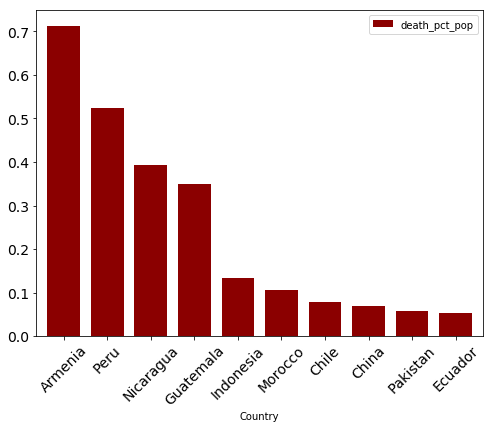

In [110]:
pop_country_top_10.plot(kind='bar',color='darkred',width=0.75,figsize=(8,6),fontsize=14)
plt.xticks(rotation=45)